<a href="https://colab.research.google.com/github/eshwarprithvi/Deep-Learning/blob/master/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
boston = datasets.load_boston()
x=pd.DataFrame(boston.data)
y=pd.DataFrame(boston.target)
x=x.to_numpy()
y=y.to_numpy()
x=x/np.mean(x)
y=y/np.mean(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True)
m=np.shape(train_x)[0]
train_x=np.nan_to_num(train_x)
train_y=np.nan_to_num(train_y)
ones=np.ones((m,1))
train_x=np.append(ones,train_x,axis=1)
n=np.shape(train_x)[1]

In [0]:
def hypothesis(theta,x):
    return np.matmul(x,theta)

In [0]:
def cost(calculated,actual):
    diff=np.subtract(calculated,actual)
    val=np.matmul(np.transpose(diff),diff)[0][0]
    val=val/(2*m)
    return val

In [0]:
def gradient_descent(calculated,actual,x,alpha,theta):
    diff=np.subtract(calculated,actual)
    grad=np.matmul(np.transpose(diff),x)
    grads=alpha*(np.transpose(grad)/np.shape(x)[0])
    theta=np.subtract(theta,grads)
    return theta

In [0]:
itrs=200000
cost_list=[]
theta=np.zeros((n,1))
for i in range(itrs):
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    #print(cost_val)
    theta=gradient_descent(calculated,train_y,train_x,0.03,theta)
    cost_list.append(cost_val)

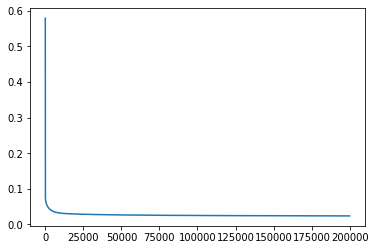

Training Cost= 0.023778804918700543


In [7]:
plt.plot(range(0,itrs),cost_list)
plt.show()
print("Training Cost=",cost_list[-1])

In [0]:
m=np.shape(test_x)[0]
test_x=np.nan_to_num(test_x)
test_y=np.nan_to_num(test_y)
ones=np.ones((m,1))
test_x=np.append(ones,test_x,axis=1)
n=np.shape(test_x)[1]

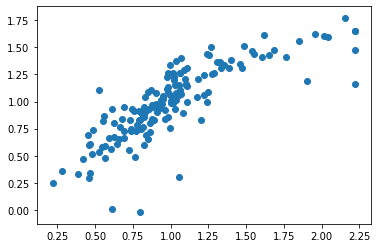

Test Cost= 0.027912251429932724


In [9]:
calculated=hypothesis(theta,test_x)
plt.scatter(test_y,calculated)
plt.show()
cost_val=cost(calculated,test_y)
print("Test Cost=",cost_val)

In [10]:
reg = LinearRegression()
reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)

print("Testing Cost",cost(predict_y,test_y))

Testing Cost 0.023404355190998788
